In [290]:
%matplotlib inline
import sys
sys.path.insert(1, '../src/')

In [291]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [292]:
import cleaning as cl
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [297]:
df = pd.read_csv('../data/training.csv') 

### distriubition of mmra attribute before cleaning

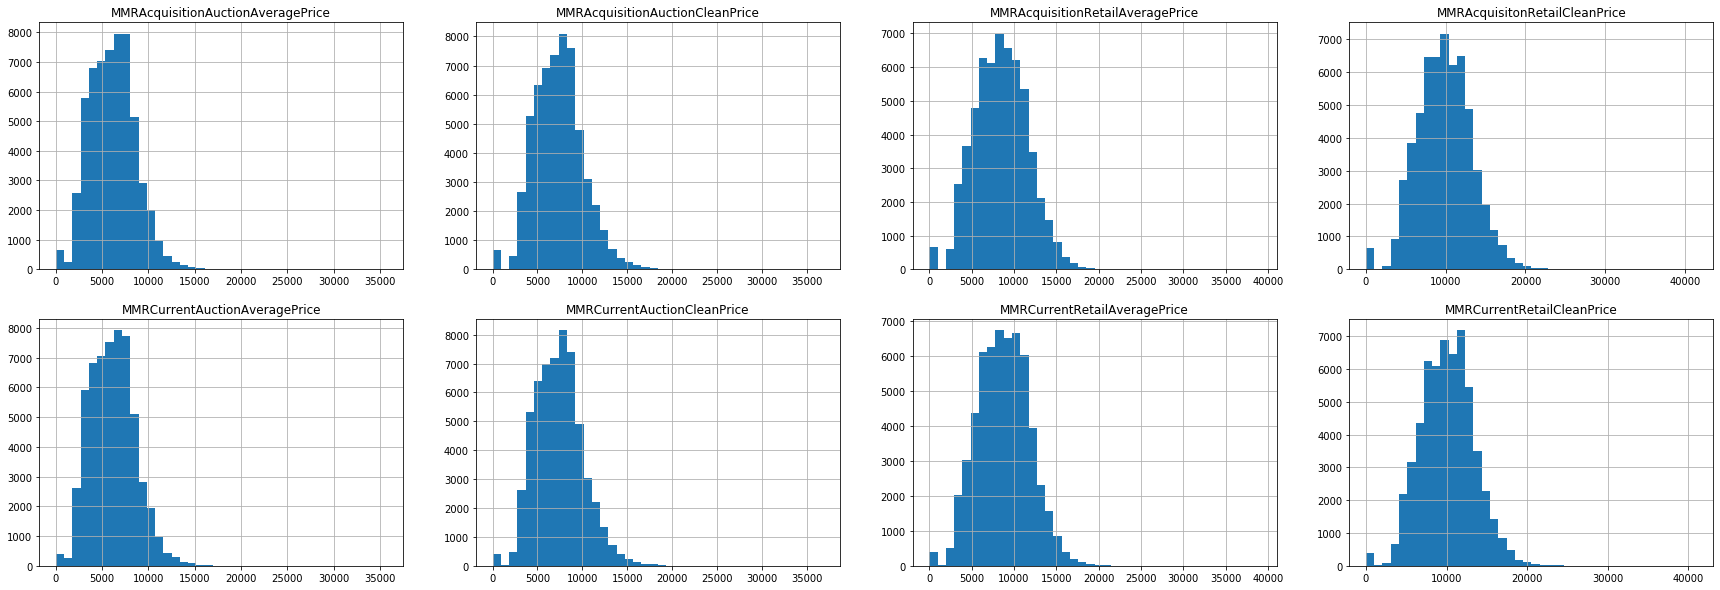

In [19]:
fig = plt.figure(figsize=(30, 10)) # any figure has 10x10 size
fig_dims = (2, 4) # 2 rows and 4 collums 
b = 40
plt.subplot2grid(fig_dims, (0, 0))
df['MMRAcquisitionAuctionAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionAveragePrice')

plt.subplot2grid(fig_dims, (0, 1))
df['MMRAcquisitionAuctionCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionCleanPrice')

plt.subplot2grid(fig_dims, (0, 2))
df['MMRAcquisitionRetailAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionRetailAveragePrice')

plt.subplot2grid(fig_dims, (0, 3))
df['MMRAcquisitonRetailCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitonRetailCleanPrice')

plt.subplot2grid(fig_dims, (1, 0))
df['MMRCurrentAuctionAveragePrice'].hist(bins = b)
plt.title('MMRCurrentAuctionAveragePrice')

plt.subplot2grid(fig_dims, (1, 1))
df['MMRCurrentAuctionCleanPrice'].hist(bins = b)
plt.title('MMRCurrentAuctionCleanPrice')

plt.subplot2grid(fig_dims, (1, 2))
df['MMRCurrentRetailAveragePrice'].hist(bins = b)
plt.title('MMRCurrentRetailAveragePrice')

plt.subplot2grid(fig_dims, (1, 3))
df['MMRCurrentRetailCleanPrice'].hist(bins = b)
plt.title('MMRCurrentRetailCleanPrice')


plt.show()

In [298]:
cl.cleaning(df)

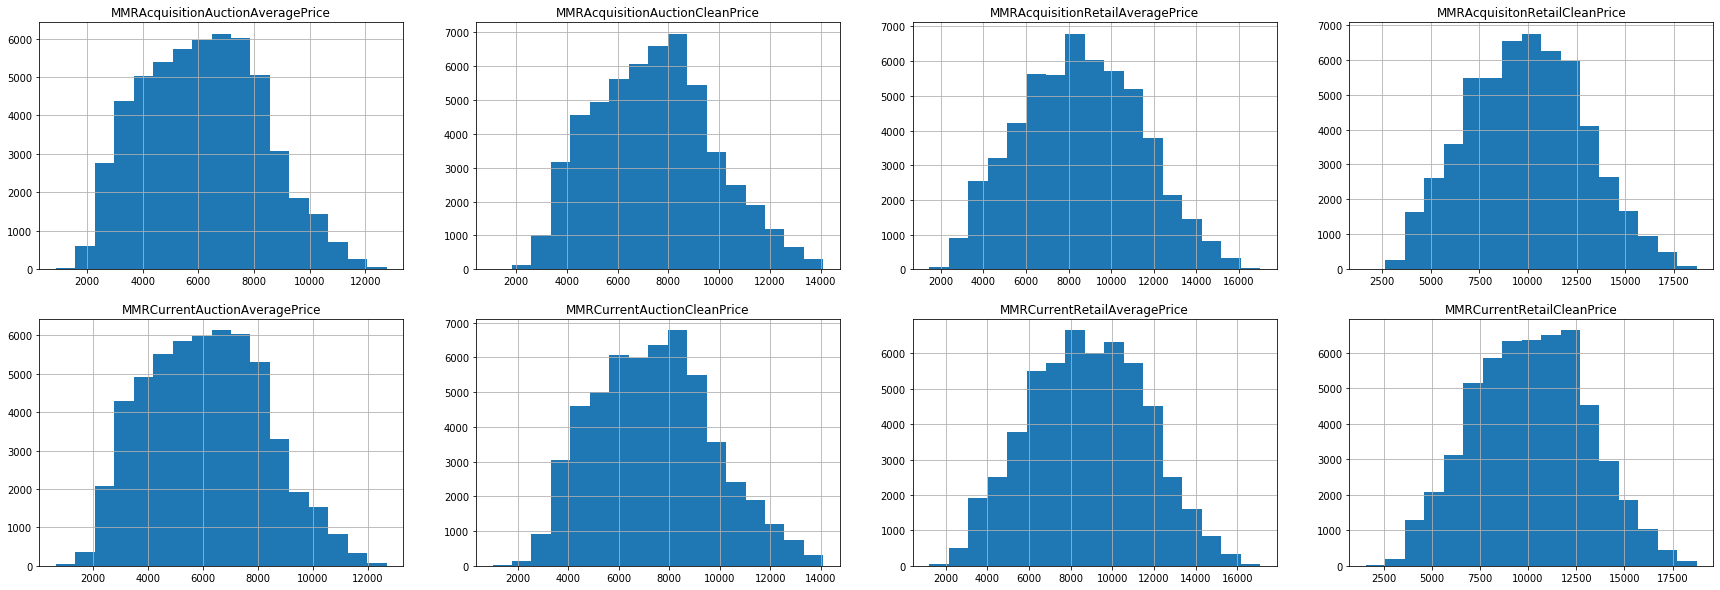

In [295]:
fig = plt.figure(figsize=(30, 10)) # any figure has 10x10 size
fig_dims = (2, 4) # 2 rows and 4 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['MMRAcquisitionAuctionAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionAveragePrice')

plt.subplot2grid(fig_dims, (0, 1))
df['MMRAcquisitionAuctionCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionCleanPrice')

plt.subplot2grid(fig_dims, (0, 2))
df['MMRAcquisitionRetailAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionRetailAveragePrice')

plt.subplot2grid(fig_dims, (0, 3))
df['MMRAcquisitonRetailCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitonRetailCleanPrice')

plt.subplot2grid(fig_dims, (1, 0))
df['MMRCurrentAuctionAveragePrice'].hist(bins = b)
plt.title('MMRCurrentAuctionAveragePrice')

plt.subplot2grid(fig_dims, (1, 1))
df['MMRCurrentAuctionCleanPrice'].hist(bins = b)
plt.title('MMRCurrentAuctionCleanPrice')

plt.subplot2grid(fig_dims, (1, 2))
df['MMRCurrentRetailAveragePrice'].hist(bins = b)
plt.title('MMRCurrentRetailAveragePrice')

plt.subplot2grid(fig_dims, (1, 3))
df['MMRCurrentRetailCleanPrice'].hist(bins = b)
plt.title('MMRCurrentRetailCleanPrice')


plt.show()

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54469 entries, 0 to 58385
Data columns (total 25 columns):
IsBadBuy                             54469 non-null int64
Auction                              54469 non-null object
VehicleAge                           54469 non-null int64
Make                                 54469 non-null object
Model                                54469 non-null object
SubModel                             54469 non-null object
Color                                54469 non-null object
Transmission                         54469 non-null object
WheelTypeID                          54469 non-null float64
VehOdo                               54469 non-null int64
Nationality                          54469 non-null object
Size                                 54469 non-null object
MMRAcquisitionAuctionAveragePrice    54469 non-null float64
MMRAcquisitionAuctionCleanPrice      54469 non-null float64
MMRAcquisitionRetailAveragePrice     54469 non-null float64
MMRAc

<h4>What we have done:</h4>
<ul>
    <li> Fill nan in WheelTypeID with the mode of group by (over Make, Model, SubModel)
    <li> Fill nan in Color with the mode (of Color)
    <li> Fill nan in Transmission with the mode (of Transmission)
    <li> Fill nan in Nationality with AMERICAN because of the nationality of the Maker
    <li> Fill manually nan in SubModel with the mode of group by (over Make, Model, Size, Trim)
    <li> Fill manually nan in Size with the mode of group by (over Make, Model)
    <li> Change Manual to MANUAL in Transmission (1 row)
    <li> Change TOYOTA SCION in SCION in Make (1 row)
    <li> Change 0.0 in WheelTypeID with the correct value (looking WheelType)
    <li> Drop PRIMEUNIT (too many missing values)
    <li> Drop AUCGUART (too many missing values)
    <li> Drop RefId (useless)
    <li> Drop VNZIP1 (redundant)
    <li> Drop VehYear 
    <li> Drop PurchDate (VehAge = PurchDate - VehYear)
    <li> Drop Trim (useless + missing values)
    <li> Drop TopThreeAmericanName (useless)
    <li> Drop WheelType (redundant)
</ul>
<h4>What we have to do:</h4>
<ul>
    <li> Change 0.0 and 1.0 values in MMRAs (using correlation)
    <li> Fill nan in MMRAs (using correlation)
    <li> Change 1.0 in VehBCost (using mean or correlation)
</ul>

### - Clean MMRAs

In [ ]:
#Per matrice di correlazione
data = df
del data['IsBadBuy']
del data['VehicleAge']
del data['WheelTypeID']
del data['VehOdo']
del data['BYRNO']
del data['VehBCost']
del data['IsOnlineSale']
del data['WarrantyCost']
del data['PRIMEUNIT']
del data['AUCGUART']
del data['RefId']
del data['VNZIP1']
del data['VehYear']
del data['PurchDate']
del data['Trim']
del data['TopThreeAmericanName']
del data['WheelType']
data.corr()

#### - Best correlations
<p>Acquisition:</p>
<ul>
    <li> MMRAcquisitionAuctionAveragePrice - MMRAcquisitionAuctionCleanPrice (1)
    <li> MMRAcquisitionAuctionAveragePrice - MMRCurrentAuctionAveragePrice (2)
    <li> MMRAcquisitionAuctionCleanPrice - MMRAcquisitionAuctionAveragePrice (1)
    <li> MMRAcquisitionAuctionCleanPrice - MMRCurrentAuctionCleanPrice (2)
    <li> MMRAcquisitionRetailAveragePrice - MMRAcquisitonRetailCleanPrice (1)
    <li> MMRAcquisitionRetailAveragePrice - MMRCurrentRetailAveragePrice (2)
    <li> MMRAcquisitonRetailCleanPrice - MMRAcquisitionRetailAveragePrice (1)
    <li> MMRAcquisitonRetailCleanPrice - MMRAcquisitionAuctionCleanPrice (2)
</ul>
<p>Current:</p>
<ul>
    <li> MMRCurrentAuctionAveragePrice - MMRCurrentAuctionCleanPrice (1)
    <li> MMRCurrentAuctionAveragePrice - MMRAcquisitionAuctionAveragePrice (2)
    <li> MMRCurrentAuctionCleanPrice - MMRCurrentAuctionAveragePrice (1)
    <li> MMRCurrentAuctionCleanPrice - MMRAcquisitionAuctionAveragePrice (2)
    <li> MMRCurrentRetailAveragePrice - MMRCurrentRetailCleanPrice (1)
    <li> MMRCurrentRetailAveragePrice - MMRCurrentAuctionAveragePrice (2)
    <li> MMRCurrentRetailCleanPrice - MMRCurrentRetailAveragePrice (1)
    <li> MMRCurrentRetailCleanPrice - MMRCurrentAuctionCleanPrice (2)
</ul>

<p>IDEA:</p>
<ul>
    <li> Sostituire nan con il valore dell'attributo (non nan) con maggiore correlazione (nella stessa riga)
    <li> Sostituire nan con la mean
</ul>

<p>Values of MMRAs to be substituted:</p>
<ul>
    <li> MMRAcquisitionAuctionAveragePrice - 0.0 (648)
    <li> MMRAcquisitionAuctionCleanPrice - 0.0 (552), 1.0 (96)
    <li> MMRAcquisitionRetailAveragePrice - 0.0 (648)
    <li> MMRAcquisitonRetailCleanPrice - 0.0 (648)
    <li> MMRCurrentAuctionAveragePrice - 0.0 (393)
    <li> MMRCurrentAuctionCleanPrice - 0.0 (300), 1.0 (93)
    <li> MMRCurrentRetailAveragePrice - 0.0 (393)
    <li> MMRCurrentRetailCleanPrice - 0.0 (393)
</ul>

### - Strange values in VehBCost

In [127]:
df.WheelTypeID.isnull().sum()

0

In [ ]:
df[df['VehBCost']<=100]['VehBCost'].value_counts()

In [128]:
df.WheelTypeID.value_counts()

1.0    30089
2.0    27707
3.0      590
Name: WheelTypeID, dtype: int64

In [9]:
df.isnull().any()

IsBadBuy                             False
Auction                              False
VehicleAge                           False
Make                                 False
Model                                False
SubModel                             False
Color                                False
Transmission                         False
WheelTypeID                          False
VehOdo                               False
Nationality                          False
Size                                 False
MMRAcquisitionAuctionAveragePrice    False
MMRAcquisitionAuctionCleanPrice      False
MMRAcquisitionRetailAveragePrice     False
MMRAcquisitonRetailCleanPrice        False
MMRCurrentAuctionAveragePrice        False
MMRCurrentAuctionCleanPrice          False
MMRCurrentRetailAveragePrice         False
MMRCurrentRetailCleanPrice           False
BYRNO                                False
VNST                                 False
VehBCost                             False
IsOnlineSal

In [94]:
df[df.WheelTypeID.isnull()][['SubModel', 'WheelTypeID','WheelType', 'Size']].isnull().sum()

SubModel        7
WheelTypeID    64
WheelType      64
Size            0
dtype: int64

In [51]:
df.Transmission.value_counts()

AUTO      56338
MANUAL     2048
Name: Transmission, dtype: int64

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53963 entries, 0 to 58385
Data columns (total 25 columns):
IsBadBuy                             53963 non-null int64
Auction                              53963 non-null object
VehicleAge                           53963 non-null int64
Make                                 53963 non-null object
Model                                53963 non-null object
SubModel                             53963 non-null object
Color                                53963 non-null object
Transmission                         53963 non-null object
WheelTypeID                          53963 non-null float64
VehOdo                               53963 non-null int64
Nationality                          53963 non-null object
Size                                 53963 non-null object
MMRAcquisitionAuctionAveragePrice    53963 non-null float64
MMRAcquisitionAuctionCleanPrice      53963 non-null float64
MMRAcquisitionRetailAveragePrice     53963 non-null float64
MMRAc

In [22]:
df[(df['WheelTypeID'].isnull())][['Make','Model','SubModel','WheelTypeID','WheelType']]

,Make,Model,SubModel,WheelTypeID,WheelType
1226,CHEVROLET,TAHOE 4WD,4D SUV 5.3L,NaN,NaN
2211,DODGE,STRATUS 4C 2.4L I-4,4D SEDAN SXT,NaN,NaN
3388,OLDSMOBILE,ALERO 4C,2D COUPE GL,NaN,NaN
5227,CHEVROLET,1500 SILVERADO PICKU,CREW CAB 5.3L LT,NaN,NaN
5764,CHRYSLER,SEBRING 4C 2.4L I4 S,4D SEDAN LX,NaN,NaN
...,...,...,...,...,...
52553,HONDA,CIVIC,4D SEDAN VALUE PACKAGE AUTO,NaN,NaN
53629,FORD,RANGER PICKUP 2WD V6,2D EXT CAB 3.0L XLT,NaN,NaN
55509,CHEVROLET,SUBURBAN 1500 4WD 5.,4D UTILITY 5.3L,NaN,NaN
55794,JEEP,COMPASS FWD 4C,4D SUV LIMITED 2.4L,NaN,NaN


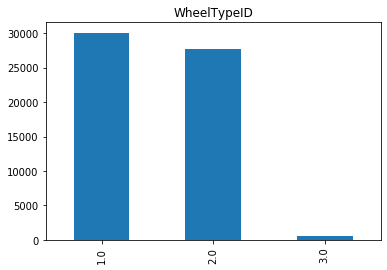

64

In [92]:
df['WheelTypeID'].value_counts().plot(kind='bar', 
                                   title='WheelTypeID')
plt.show()
df['WheelTypeID'].isnull().sum()

In [268]:
df[
    (df['Make'] == "DODGE") & (df['Model'] == "STRATUS 4C 2.4L I-4") & (df['SubModel'] == "4D SEDAN SXT")
][['Make','Model', 'WheelType','WheelTypeID']]

,Make,Model,WheelType,WheelTypeID
2211,DODGE,STRATUS 4C 2.4L I-4,NaN,NaN
40488,DODGE,STRATUS 4C 2.4L I-4,NaN,NaN


In [81]:
df = df.drop(df[(df.IsBadBuy == 1) & (df.VehOdo > 111637)].index)

In [125]:
quantiles = df[(df.IsBadBuy == 1)]['VehOdo'].quantile([0.01, 0.99])
print(quantiles)
quantiles = df[(df.IsBadBuy == 0)]['VehOdo'].quantile([0.01, 0.99])
print(quantiles[0.01])

0.01   NaN
0.99   NaN
Name: VehOdo, dtype: float64
nan


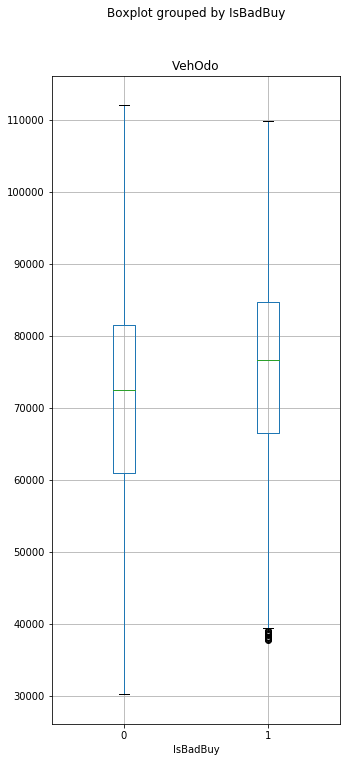

In [183]:
boxplot = df.boxplot(column=['VehOdo'], figsize=(5,12), by='IsBadBuy')

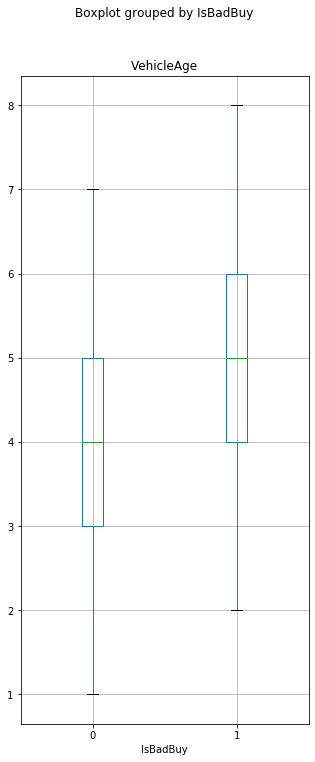

In [184]:
boxplot = df.boxplot(column=['VehicleAge'], figsize=(5,12), by='IsBadBuy')


In [246]:
df.loc[df['MMRAcquisitionAuctionAveragePrice'] == 0.0, 'MMRAcquisitionAuctionAveragePrice'] = df[df['MMRAcquisitionAuctionAveragePrice'] == 0.0]['MMRCurrentAuctionAveragePrice']


In [276]:
features = [    'MMRAcquisitionAuctionAveragePrice',
                    'MMRAcquisitionAuctionCleanPrice', 
                    'MMRAcquisitionRetailAveragePrice',
                    'MMRAcquisitonRetailCleanPrice',
                    'MMRCurrentAuctionAveragePrice',
                    'MMRCurrentAuctionCleanPrice',
                    'MMRCurrentRetailAveragePrice',
                    'MMRCurrentRetailCleanPrice',
                    ]
for feature in features:
    print(df[(df[feature] == 0.0) | (df[feature] == 1.0)][feature].value_counts())

Series([], Name: MMRAcquisitionAuctionAveragePrice, dtype: int64)
Series([], Name: MMRAcquisitionAuctionCleanPrice, dtype: int64)
Series([], Name: MMRAcquisitionRetailAveragePrice, dtype: int64)
Series([], Name: MMRAcquisitonRetailCleanPrice, dtype: int64)
Series([], Name: MMRCurrentAuctionAveragePrice, dtype: int64)
Series([], Name: MMRCurrentAuctionCleanPrice, dtype: int64)
Series([], Name: MMRCurrentRetailAveragePrice, dtype: int64)
Series([], Name: MMRCurrentRetailCleanPrice, dtype: int64)
